In [3]:
import matplotlib.pyplot as plt
import numpy as np
!pip install opencv-python

import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 10.1 MB/s eta 0:00:0000:0100:01


In [4]:
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 19s 0us/step


In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8983268106_dc913d17d8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14267691818_301aceda07.jpg'),
 PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/17990320484_93bba345d2_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/18599603859_f2ec616ddf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8723767157_c45bfd3ab6.jpg')

In [9]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [10]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15011625580_7974c44bce.jpg'),
 PosixPath('datasets/flower_photos/roses/17953368844_be3d18cf30_m.jpg')]

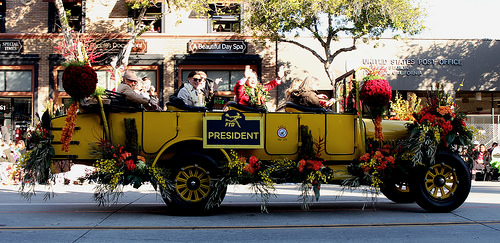

In [12]:
PIL.Image.open(str(roses[0]))

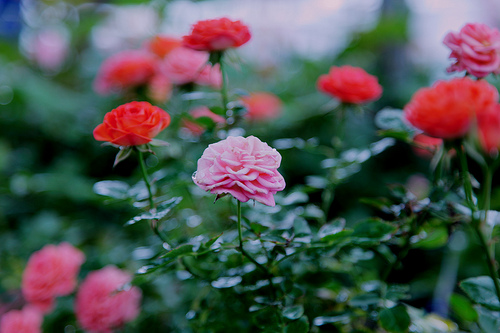

In [13]:
PIL.Image.open(str(roses[1]))

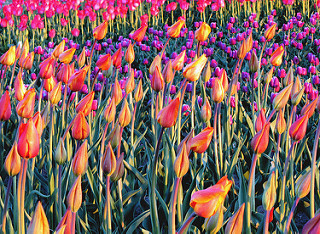

In [16]:
tulips=list(data_dir.glob('tulips/*'))
tulips
PIL.Image.open(str(tulips[0]))

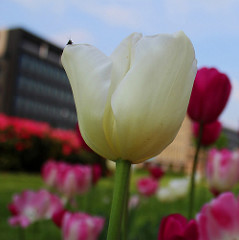

In [17]:
PIL.Image.open(str(tulips[1]))

In [40]:
flower_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [22]:
flower_images_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/14167534527_781ceb1b7a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5512287917_9f5d3f0f98_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/476857510_d2b30175de_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/521762040_f26f2e08dd.jpg'),
 PosixPath('datasets/flower_photos/daisy/7320089276_87b544e341.jpg'),
 PosixPath('datasets/flower_photos/daisy/8008258043_5457dd254b_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/721595842_bacd80a6ac.jpg'),
 PosixPath('datasets/flower_photos/daisy/8719756744_34a5a83976_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5110107234_12ddc0206b_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/20773528301_008fcbc5a1_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/144076848_57e1d662e3_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/510844526_858b8fe4db.jpg'),
 PosixPath('datasets/flower_photos/daisy/5632774792_0fa33d17eb_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/12891819633_e4c82b51e8.jpg'),
 Pos

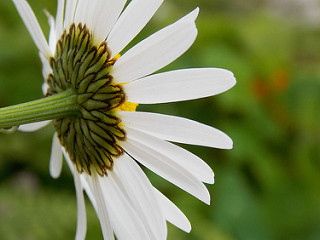

In [24]:
daisy=list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

In [44]:
flowers_labels_dic={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
    
}


In [28]:
str(flower_images_dict['roses'][0])

'datasets/flower_photos/roses/16209331331_343c899d38.jpg'

In [29]:
img=cv2.imread(str(flower_images_dict['roses'][0]))#open_cv_always_expecting_a_string_path 

In [30]:
img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

In [31]:
img.shape

(243, 500, 3)

In [33]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [41]:
X,y=[],[]
for flower_name, images in flower_images_dict.items():
    print(flower_name)
    print(len(images))


roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [46]:
X,y=[],[]
for flower_name, images in flower_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dic[flower_name])


In [47]:
X[0]

array([[[  2,   0,   2],
        [ 10,   5,   1],
        [ 89,  85,  97],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[ 14,  33,  73],
        [  6,   1,   2],
        [ 92,  90, 105],
        ...,
        [243, 244, 242],
        [244, 245, 243],
        [243, 244, 242]],

       [[122, 176, 224],
        [ 10,   1,   2],
        [ 72,  80,  84],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[147, 109,  85],
        [145, 109,  85],
        [144, 108,  84],
        ...,
        [155, 122,  96],
        [152, 121,  95],
        [149, 118,  93]],

       [[148, 114,  91],
        [154, 120,  96],
        [146, 112,  88],
        ...,
        [155, 125,  98],
        [153, 121,  95],
        [152, 122,  93]],

       [[153, 119,  96],
        [151, 117,  93],
        [152, 117,  94],
        ...,
        [154, 124,  97],
        [153, 121,  95],
        [153, 123,  94]]

In [49]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [50]:
X=np.array(X)
y=np.array(y)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

In [52]:
len(X_train)

2752

In [53]:
len(X_test)#Default_Split_is_25%

918

In [54]:
X_train_scaled= X_train/255#for normalisation
X_test_scaled=X_test/255

In [55]:
X_train_scaled[0]

array([[[0.69411765, 0.67058824, 0.74901961],
        [0.70196078, 0.68235294, 0.78431373],
        [0.7254902 , 0.68627451, 0.78039216],
        ...,
        [0.17647059, 0.24705882, 0.24313725],
        [0.16078431, 0.21568627, 0.20784314],
        [0.07058824, 0.29803922, 0.25098039]],

       [[0.70196078, 0.65098039, 0.76470588],
        [0.71764706, 0.66666667, 0.78823529],
        [0.72156863, 0.66666667, 0.77254902],
        ...,
        [0.12156863, 0.18431373, 0.17647059],
        [0.14117647, 0.17254902, 0.16862745],
        [0.06666667, 0.39607843, 0.3372549 ]],

       [[0.70588235, 0.63529412, 0.74901961],
        [0.73333333, 0.65882353, 0.77647059],
        [0.72941176, 0.66666667, 0.76078431],
        ...,
        [0.10980392, 0.18039216, 0.16862745],
        [0.20392157, 0.22745098, 0.21960784],
        [0.07058824, 0.50588235, 0.42745098]],

       ...,

       [[0.22352941, 0.29019608, 0.16470588],
        [0.17647059, 0.27058824, 0.14509804],
        [0.27843137, 0

In [56]:
num_classes= 5
model=Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [57]:
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 9s 103ms/step - loss: 1.2236 - accuracy: 0.4942
Epoch 2/30
86/86 [==============================] - 9s 108ms/step - loss: 0.9163 - accuracy: 0.6446
Epoch 3/30
86/86 [==============================] - 9s 103ms/step - loss: 0.7211 - accuracy: 0.7307
Epoch 4/30
86/86 [==============================] - 9s 103ms/step - loss: 0.4965 - accuracy: 0.8216
Epoch 5/30
86/86 [==============================] - 9s 103ms/step - loss: 0.2722 - accuracy: 0.9146
Epoch 6/30
86/86 [==============================] - 9s 103ms/step - loss: 0.1466 - accuracy: 0.9535
Epoch 7/30
86/86 [==============================] - 9s 104ms/step - loss: 0.0663 - accuracy: 0.9829
Epoch 8/30
86/86 [==============================] - 9s 104ms/step - loss: 0.0364 - accuracy: 0.9935
Epoch 9/30
86/86 [==============================] - 9s 104ms/step - loss: 0.0371 - accuracy: 0.9909
Epoch 10/30
86/86 [==============================] - 9s 103ms/step - loss: 0.0429 - accuracy: 0.9855

In [58]:
model.evaluate(X_test_scaled, y_test) #Overfitting

29/29 [==============================] - 1s 28ms/step - loss: 2.7329 - accuracy: 0.6743


[2.732865810394287, 0.6742919683456421]

In [59]:
predictions= model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 30ms/step


array([[  5.846343  ,  12.127088  ,   8.146368  ,  -9.7644    ,
          1.589306  ],
       [ 12.434988  ,   4.1617846 , -11.523123  ,  -3.7319925 ,
          5.2394786 ],
       [  1.3128232 ,   1.3491458 ,  22.26826   ,   0.83742905,
         -4.674566  ],
       ...,
       [ -5.6171412 ,   5.9280496 ,   9.424945  ,  24.774569  ,
         -2.2315688 ],
       [ 11.916703  ,  -0.5764686 ,  -5.3334727 ,  -5.2094646 ,
          1.5998592 ],
       [ -1.9448105 , -11.017101  ,   5.5655107 ,  40.20716   ,
          8.626274  ]], dtype=float32)

In [61]:
#Tensorflow_has_softmax_function_which_can_convert_above_values_into_probability
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.8342739e-03, 9.7984385e-01, 1.8295839e-02, 3.0465258e-10,
       2.5981033e-05], dtype=float32)>

In [62]:
np.argmax(score)

1

In [63]:
y_test[0]

1

In [74]:
#Use_data_augmentation_to_deal_with_over_fitting
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.4)
])

In [78]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9)
])

In [82]:
data_augmentation= keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.9)
])

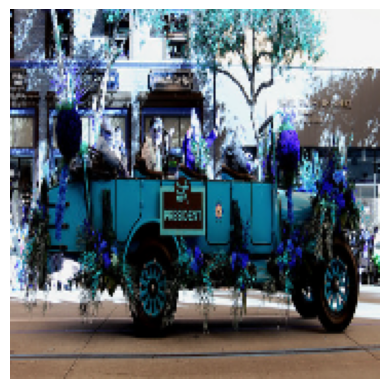

In [67]:
plt.axis('off')
plt.imshow(X[0])

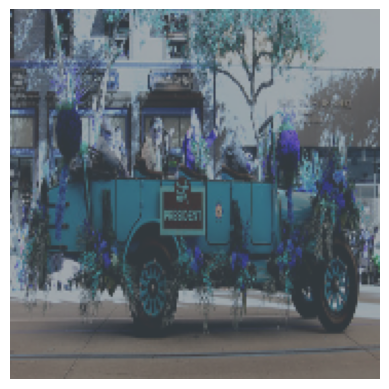

In [79]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

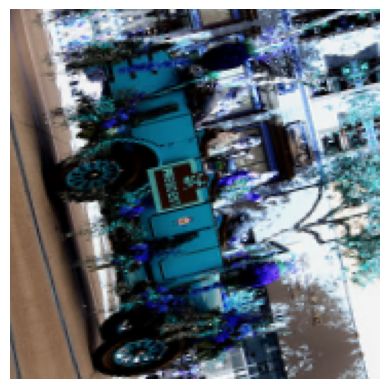

In [83]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

In [88]:
data_augmentation=keras.Sequential([
    #layers.experimental.preprocessing.RandomFlip('horizontal',
                                                #input_shape=(img_height,
                                                             #img_width,
                                                             #3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])

In [92]:
num_classes= 5
model1=Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])
model1.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
model1.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 10s 113ms/step - loss: 1.5941 - accuracy: 0.2624
Epoch 2/30
86/86 [==============================] - 10s 122ms/step - loss: 1.5516 - accuracy: 0.3129
Epoch 3/30
86/86 [==============================] - 12s 136ms/step - loss: 1.5230 - accuracy: 0.3339
Epoch 4/30
86/86 [==============================] - 13s 152ms/step - loss: 1.4870 - accuracy: 0.3557
Epoch 5/30
86/86 [==============================] - 13s 155ms/step - loss: 1.4735 - accuracy: 0.3703
Epoch 6/30
86/86 [==============================] - 12s 144ms/step - loss: 1.4486 - accuracy: 0.3837
Epoch 7/30
86/86 [==============================] - 11s 130ms/step - loss: 1.4305 - accuracy: 0.3881
Epoch 8/30
86/86 [==============================] - 10s 117ms/step - loss: 1.4060 - accuracy: 0.4073
Epoch 9/30
86/86 [==============================] - 11s 122ms/step - loss: 1.3751 - accuracy: 0.4320
Epoch 10/30
86/86 [==============================] - 10s 120ms/step - loss: 1.3646 - accura

In [93]:
model1.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 31ms/step - loss: 2.6048 - accuracy: 0.3137


[2.6048378944396973, 0.3137255012989044]